In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris, load_wine

In [18]:
def load_iris():
    try:
        from ucimlrepo import fetch_ucirepo
        ds = fetch_ucirepo(id=53)
        X = pd.DataFrame(ds.data.features)
        y = pd.DataFrame(ds.data.targets)
        y_col = y.columns[0]
        y = y[y_col].astype(str).str.replace(r'^Iris-', '', regex=True)
        return X.values, y.values.ravel()
    except Exception:
        # Fallback to sklearn's load_iris if ucimlrepo is not available
        from sklearn.datasets import load_iris as sk_load_iris
        data = sk_load_iris()
        X = pd.DataFrame(data.data, columns=data.feature_names)
        target_names = data.target_names
        y = np.array([target_names[i] for i in data.target])
        return X.values, y


def load_wine():
    try:
        from ucimlrepo import fetch_ucirepo
        ds = fetch_ucirepo(id=109)
        X = pd.DataFrame(ds.data.features)
        y = pd.DataFrame(ds.data.targets).iloc[:,0]
        return X.values, y.values.ravel()
    except Exception:
        # Fallback to sklearn's load_wine if ucimlrepo is not available
        from sklearn.datasets import load_wine as sk_load_wine
        data = sk_load_wine()
        X = pd.DataFrame(data.data, columns=data.feature_names)
        y = data.target
        return X.values, y

In [12]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    X = np.asarray(X)
    y = np.asarray(y)
    n = X.shape[0]
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(n)
    np.random.shuffle(indices)
    test_count = int(np.floor(test_size * n))
    test_idx = indices[:test_count]
    train_idx = indices[test_count:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

In [15]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.asarray(X_train)
        self.y_train = np.asarray(y_train)

    def _predict_one(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        nearest_indices = np.argsort(distances)[:self.k]
        nearest_labels = self.y_train[nearest_indices]
        votes = Counter(nearest_labels)
        return votes.most_common(1)[0][0]

    def predict(self, X_test):
        return np.array([self._predict_one(x) for x in X_test])

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == np.asarray(y_test))

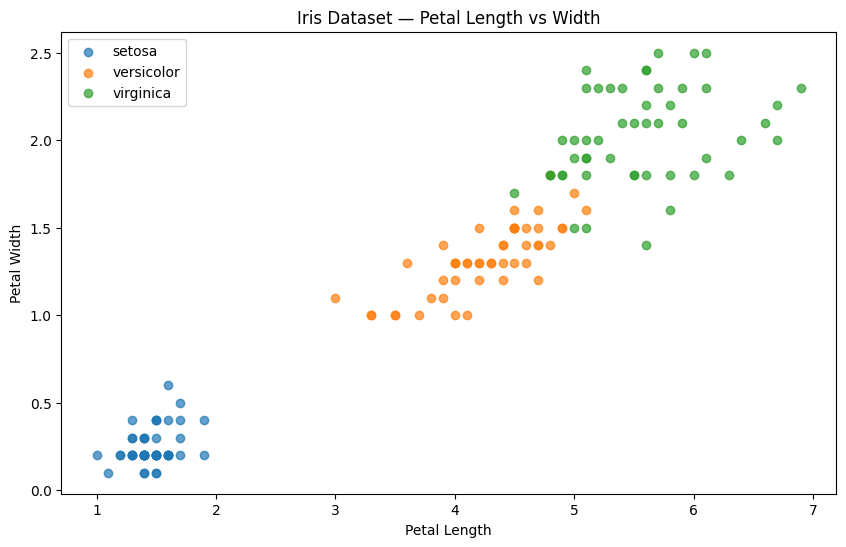

In [23]:
X, y = load_iris()
feature_names = ["sepal length", "sepal width", "petal length", "petal width"]
unique_labels = np.unique(y)


plt.figure(figsize=(10,6))
for i, label in enumerate(unique_labels):
    plt.scatter(X[y == label, 2], X[y == label, 3], label=label, alpha=0.7)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Dataset — Petal Length vs Width')
plt.legend()
plt.show()

In [25]:
def evaluate_knn(load_fn, dataset_name, ks=[1,3,5,7,9,11,15], test_size=0.2, random_state=42):
    X, y = load_fn()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    accuracies = []

    for k in ks:
        model = KNNClassifier(k=k)
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        accuracies.append(acc)
        print(f"{dataset_name} | k={k}: accuracy={acc:.4f}")

    plt.figure(figsize=(8,5))
    plt.plot(ks, accuracies, marker='o')
    plt.title(f'Accuracy vs k for {dataset_name}')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

    best_k = ks[np.argmax(accuracies)]
    print(f"Best k for {dataset_name}: {best_k} with accuracy={max(accuracies):.4f}")
    return best_k, max(accuracies)


🔹 Evaluating on IRIS Dataset
Iris | k=1: accuracy=1.0000
Iris | k=3: accuracy=1.0000
Iris | k=5: accuracy=1.0000
Iris | k=7: accuracy=0.9667
Iris | k=9: accuracy=1.0000
Iris | k=11: accuracy=1.0000
Iris | k=15: accuracy=1.0000


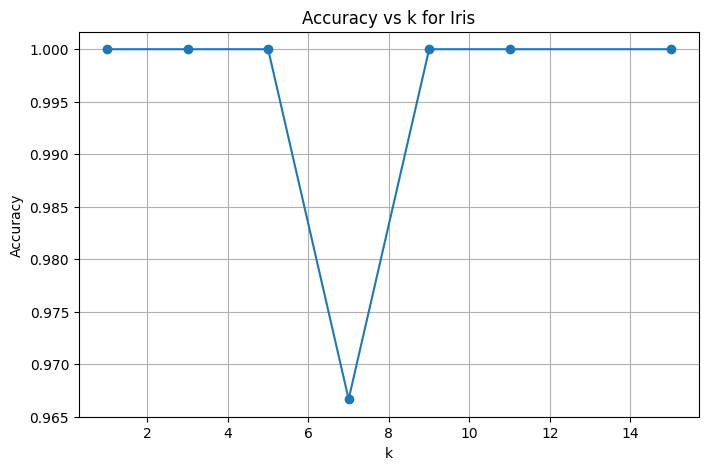

Best k for Iris: 1 with accuracy=1.0000

🔹 Evaluating on WINE Dataset
Wine | k=1: accuracy=0.7714
Wine | k=3: accuracy=0.8000
Wine | k=5: accuracy=0.7429
Wine | k=7: accuracy=0.6857
Wine | k=9: accuracy=0.7429
Wine | k=11: accuracy=0.7714
Wine | k=15: accuracy=0.7429


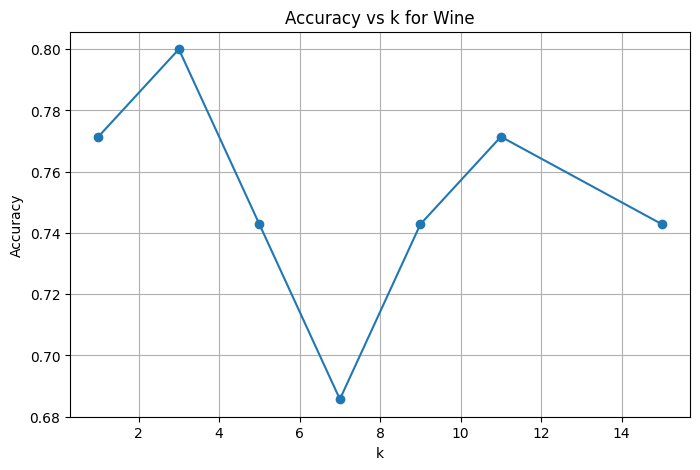

Best k for Wine: 3 with accuracy=0.8000

✅ Final Results:
Iris — Best k: 1, Accuracy: 1.0000
Wine — Best k: 3, Accuracy: 0.8000


In [26]:
# Iris Dataset
print("\n🔹 Evaluating on IRIS Dataset")
best_k_iris, best_acc_iris = evaluate_knn(load_iris, 'Iris')


# Wine Dataset
print("\n🔹 Evaluating on WINE Dataset")
best_k_wine, best_acc_wine = evaluate_knn(load_wine, 'Wine')


print("\n✅ Final Results:")
print(f"Iris — Best k: {best_k_iris}, Accuracy: {best_acc_iris:.4f}")
print(f"Wine — Best k: {best_k_wine}, Accuracy: {best_acc_wine:.4f}")